# Missing Puzzles

In [1]:
import numpy as np
from astropy import units as u

## Observed synchrotron spectrum 

can be used to put constaints on the energetics of nebula. 

- Rolloff frequency（截止频率）：在天文学中，截止频率可以表示天体光谱中某个特定波段的频率，在该频率之后，光谱的强度开始显著减小或衰减。这可能指的是某个天体辐射的电磁波在特定频段内的衰减。

- Spectral break frequency（频谱截止频率）：频谱截止频率可能指的是天体光谱中的一个点，在该点之后光谱的特征或行为发生突变或突然变化。这个频率点可能表示光谱特征的转折或突变，可能与特定的物理过程或天体属性有关

## Spectral break
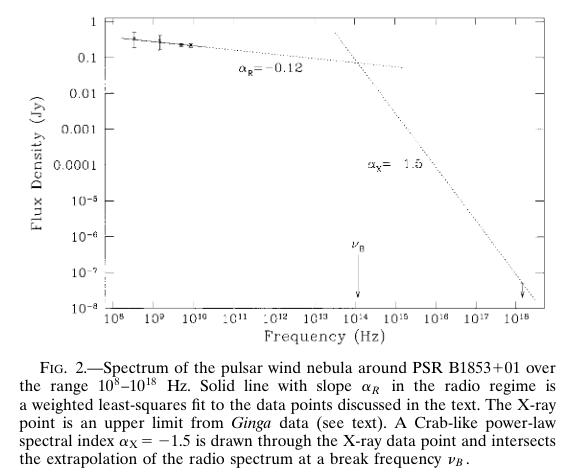

Frail1996a

他怎么做出来的这个图啊, 是的，要找两个频段的东西才能做。

Spectral breaks hold the key to understanding the physical conditions of nebula and the pulsar wind. If the break results from synchrotron losses, then given the age of the source t_res , we can estimate the nebular field B_n.

specindex -0.40526861365112793 b 2.3186334412040916


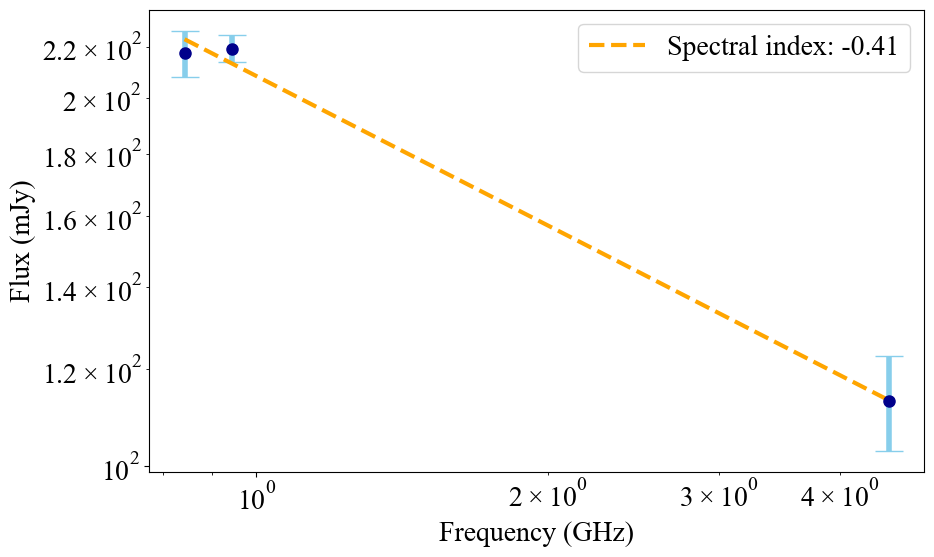

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import pandas as pd
from matplotlib.ticker import ScalarFormatter
def sv_fig(name):
    sv = plt.savefig(name + '.png', bbox_inches='tight', dpi = 300)
    sv = plt.savefig(name + '.pdf', bbox_inches='tight')
    return sv


config = {
    "font.family":'serif',
    "font.size": 20,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'], # simsun字体中文版就是宋体
}
plt.rcParams['font.size'] = 20
plt.rc('font',family='Times New Roman')


data_orig = np.array([
    (0.843, 217.4, 9.4),
    (0.944, 219.3, 5.6),
    # (2.4  , 600  , 0 ),
    (4.5  , 113  , 10),
    # (4.5  , 131  , 10),
    # (5.5  , 150  ,  9),
    # (9.   , 147  ,  9)
])

def show_specindex(data, plot=True):
    freq_orig = data[:, 0]
    flux_orig = data[:, 1]
    error = data[:, 2]

    freq = np.log10(freq_orig)
    flux = np.log10(flux_orig)

    model = models.Linear1D()
    fitter = fitting.LinearLSQFitter()
    best_fit = fitter(model, freq, flux)
    specindex = best_fit.parameters[0]
    b = best_fit.parameters[1]
    print("specindex",specindex,"b", b)

    # df = pd.DataFrame(data, columns=['Freq (GHz)', 'Flux (mJy)', 'Error'])

    # 打印DataFrame
    # print(df)

    if plot:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.errorbar(freq_orig, flux_orig, yerr=error, fmt='o', ecolor='skyblue', color='darkblue', elinewidth=4, capsize=10, ms=8)
        

        # Plotting the best fit line
        x_fit = np.linspace(min(freq_orig), max(freq_orig), 100)
        y_fit = 10 ** best_fit(np.log10(x_fit))
        ax.plot(x_fit, y_fit, color='orange', linewidth=3, linestyle = "--", label=f'Spectral index: {specindex:.2f}')

        ax.set_xlabel('Frequency (GHz)')
        ax.set_ylabel('Flux (mJy)')
        # ax.set_title('Spectral Index')

        # 设置横坐标和纵坐标为对数刻度
        ax.set_xscale('log')
        ax.set_yscale('log')

        
        
        # plt.grid()

        

    return ax

# data = data_orig[[0,3]]
# data_point = (9.43E+08, 2.58, 0.002)
data = data_orig
ax = show_specindex(data, True)
# ax.errorbar(data_orig[2,0], data_orig[2,1], yerr=data_orig[2,2], fmt='o', ecolor='pink', color='darkred', elinewidth=4, capsize=10, ms=8, label = "MFS")

ax.legend(loc='best') 
# sv_fig("../Output/SpecIndex_PWN_all" )
# data = data[[0,1,4,5,6,]]
# show_specindex(data, True)
# sv_fig("../Output/SpecIndex_PWN_all_my" )
# sv_fig("../Output/SpecIndexFig_SNR" )
plt.show()

## Use age to get the B



Frail1996a

In [4]:
# 怎么算nu_B the spectrum must break



def B_n(nu_B, t_res):
    B_n = 1040 * 1e-6 * u.G * (nu_B / (1e12 * u.Hz)) ** (-1/3) * (t_res/(1000 * u.yr)) ** (-2/3)
    return B_n.to(u.G) # YES!!!

B_PWN = B_n(5.7e11 * u.Hz, 5700 * u.yr) 
print(B_PWN)

B_PWN = B_n(1.2e14 * u.Hz, 5700 * u.yr)
print(B_PWN)

B_PWN = B_n(1.2e17 * u.Hz, # mu
            2500 * u.yr    # age
           ) * 1e6

print (B_PWN)


0.00039308983818125596 G
6.607791843139834e-05 G
11.446681129501375 G


In [5]:

pi = np.pi
d_n = 7/9

## Minimum-energy Magnetic Field Strength in the PWN


We computed the minimum-energy magnetic field strength by imposing the conventional assumption, i.e., that the total energy U_total is distributed between magnetic energy U_B and particle energy U_p in a way that U_total is minimized.

From synchrotron theory (Pacholczyk 1970), we have

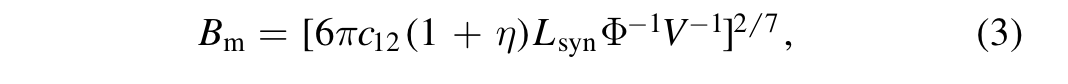

where Φ is the volume filling factor of the magnetic field, V is the volume of the emission region, c_12 is a constant weakly depending on the spectral index and frequency range considered, η is the energy ratio of ions to electrons, and L_syn is the synchrotron luminosity of the PWN. Minimizing U_total gives a minimum-energy field,

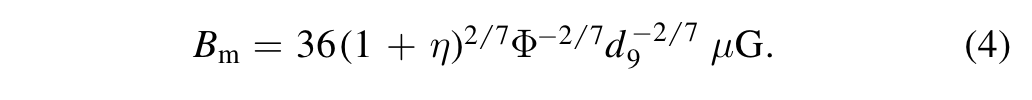

which is also referred to as the “equipartition field” in some literature.

Ma2016

In [6]:
def B_m_PWN(L_syn, V, c_12 = 1e6, Eta = 0, phi = 1, d_n = 1):

    B_m = (6 * pi * c_12 * (1 + Eta) * L_syn / (phi * V)) ** (2/7)
    return B_m *u.G
'''
# C_12是个什么东西
B_m = B_m_PWN(
    L_syn = 2.9e35 * d_n **2, # * (u.erg / u.s),
    V = 1.8e58 * d_n **3, # * u.cm ** 3,
    
)

B_body = B_m_PWN(
    L_syn = 2.1e35 * d_n **2, # * (u.erg / u.s),
    V = 1.8e58 * d_n **3, # * u.cm ** 3,
)

B_head = B_m_PWN(
    L_syn = 4.1e33 * d_n **2, # * (u.erg / u.s),
    V = 9.9e55 * d_n **3, # * u.cm ** 3,
)
'''

def R(r_o,d=7* u.kpc):
    R = d * np.tan(r_o)
    return R.to(u.pc)
r = R (48 * u.arcsec ) #".to(u.cm)
print(r)

v = 3.24896241775784e+22 ** 3 * np.pi * (4/3)
print(v)



B_my = B_m_PWN(
    L_syn = 1.3e35 * d_n **2, # * (u.erg / u.s),
    V = v * d_n **3, # * u.cm ** 3,
)* 1.e6
# print(B_m,B_body,B_head)

print(B_my)
#B_head 对不上 单位也无法自动转换

1.6289739979333067 pc
1.436556370454983e+68
0.0466526242106413 G


## PWN Age

The broadband synchrotron spectra of PWNe often steepen at high frequency due to synchrotron cooling.

For a single population of particles injected into the system, the spectral break frequency ν_b and magnetic field strength B could be used to estimete the PWN age τ by (Gaensler & Slane 2006)

Reynolds2023

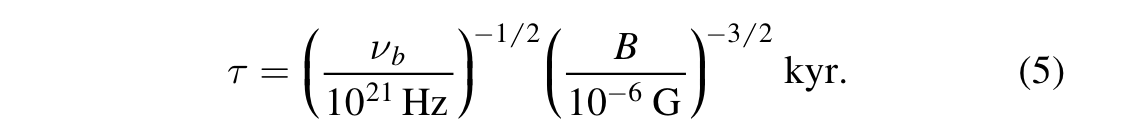

In [8]:

def age_PWN(nu_b, B):
    
    tau = \
    (nu_b/(10 ** 21 * u.Hz)) ** (-1/2) * \
    (B / (10 ** (-6) *u.G)) ** (-3/2)
    return tau * u.yr

tau_PWN = age_PWN(1e13*u.Hz, B_my)

print(f'{tau_PWN:.0f}') # YES!

0 yr


### expansion

Temim2009
VanDerSwaluw2001




# PWN B
Klingler2023a

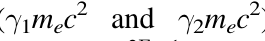

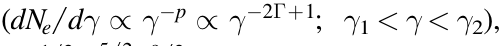

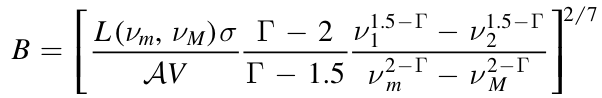



In [9]:
def nu_syn(B, gamma, m_e, c):
    nu_syn = 3 * e * B * gamma **2 / (4 * np.pi * m_e * c)
    return nu_syn

# nu_1 = nu_syn()


def func_B_PWN(L, sigma, Gamma, nu_1, nu_2, nu_m, nu_M):
    '''
    L: 1e-134 erg cm^-2 s^-1
    , sigma, Gamma, 
    nu_1, nu_2: characteristic synchrotron frequencies
    nu_m, nu_M
    '''
    B_PWN = (L / (AV) \
             * ((Gamma - 2) / (Gamma - 1.5)) \
             * (nu_1 ** (1.5 - gamma) - nu_2 ** (1.5 - gamma)) / ((nu_m) ** (2 - gamma) - (nu_M) ** (2 - gamma)))\
             ** (2/7)
    return B_PWN

B_PWN = func_B_PWN(
    L = 1.3

SyntaxError: unexpected EOF while parsing (830721332.py, line 22)

The Lorentz factors of the escaped particles.

Klingler2023a

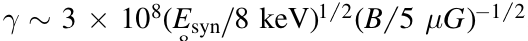



In [ ]:
from astropy import units as u

def gamma(E_syn, B):
    gamma = (3 * 10 ** 8) * ((E_syn / (8 * u.keV)) ** (1/2)) * ((B / (5e-6 * u.G)) ** (-1/2))
    return gamma * 1e-8

print(gamma(1 * u.keV, 5e-6 * u.G), gamma(25 * u.keV, 5e-6 * u.G)) #yes!


# Reynolds 2008

There are some important basic rules.

And some explaination or application are in Reynolds2012.

Reynolds1999
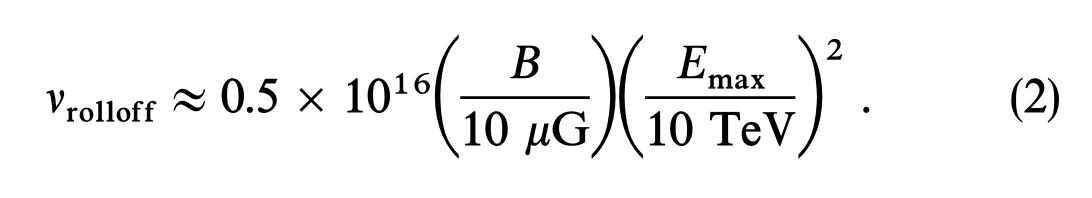

Reynolds2008
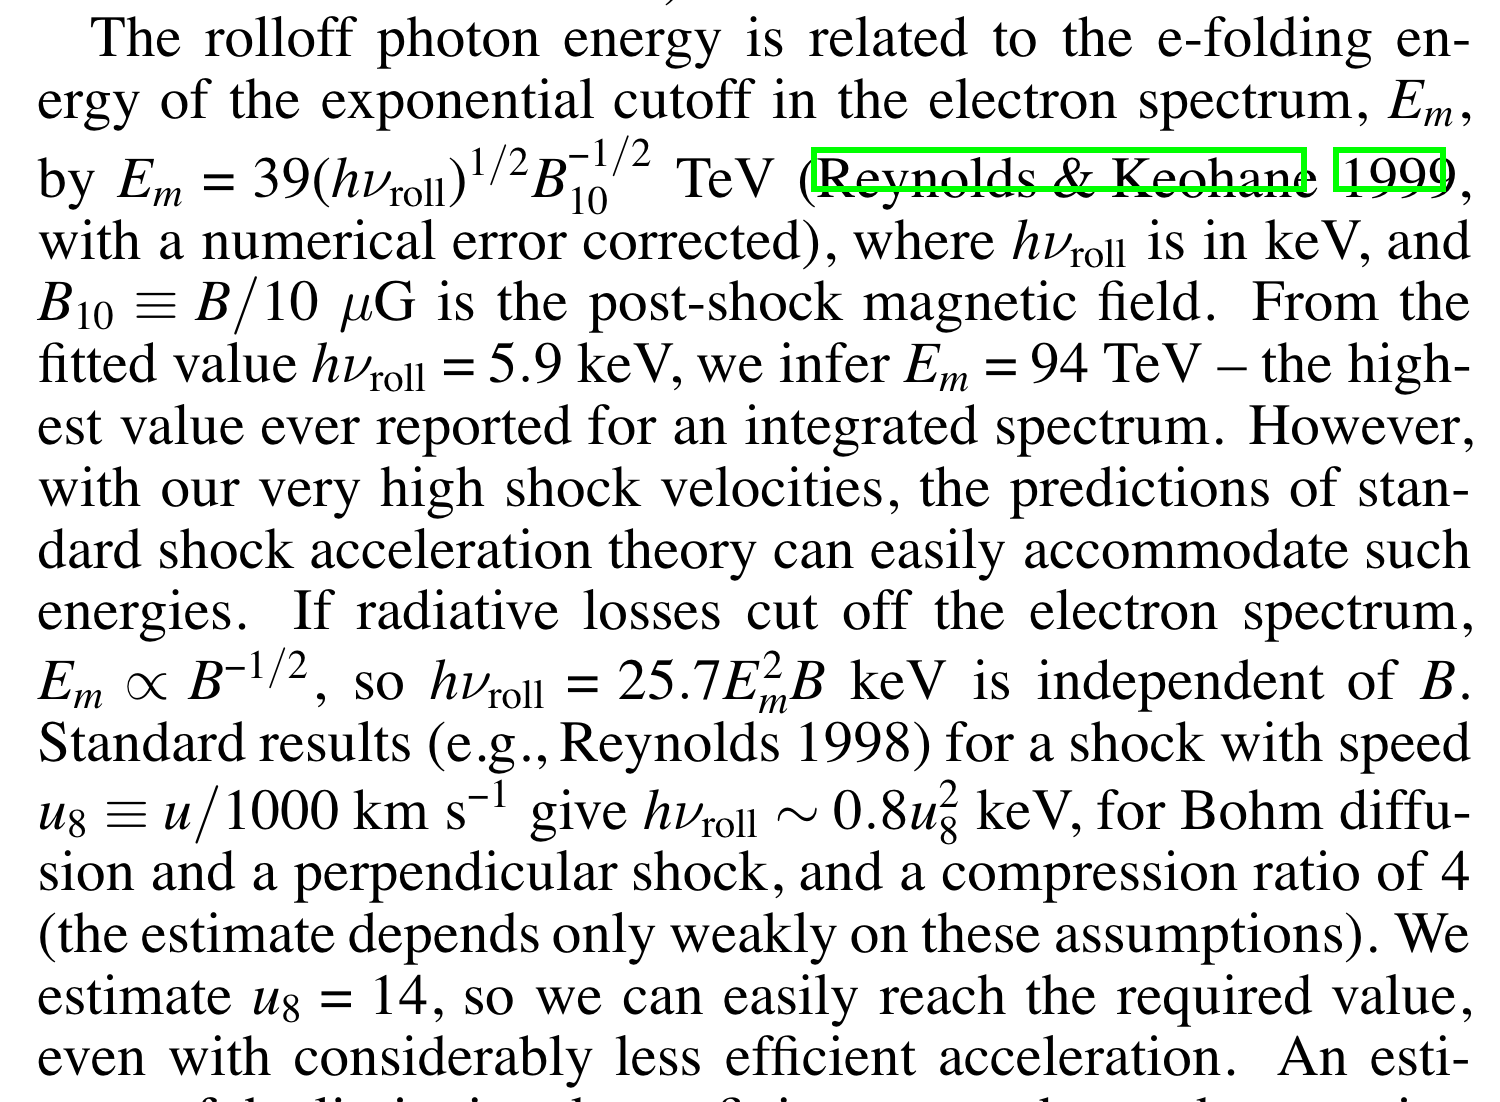

Zoglauer2015
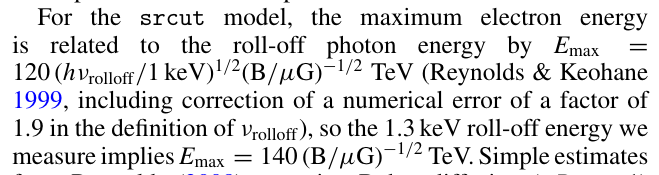

Reynolds2012
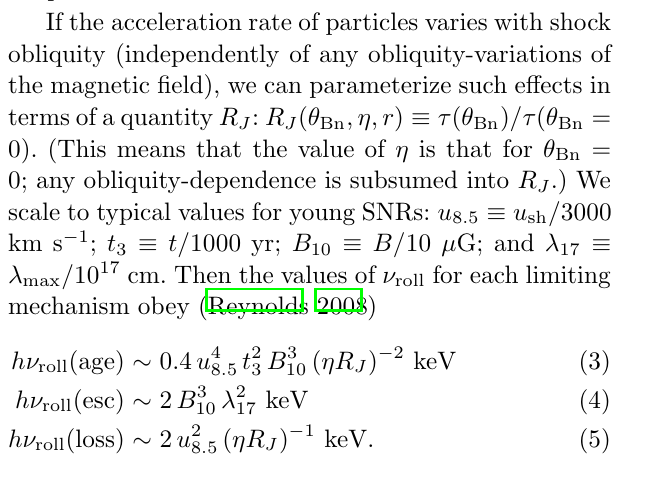

Reynolds2019
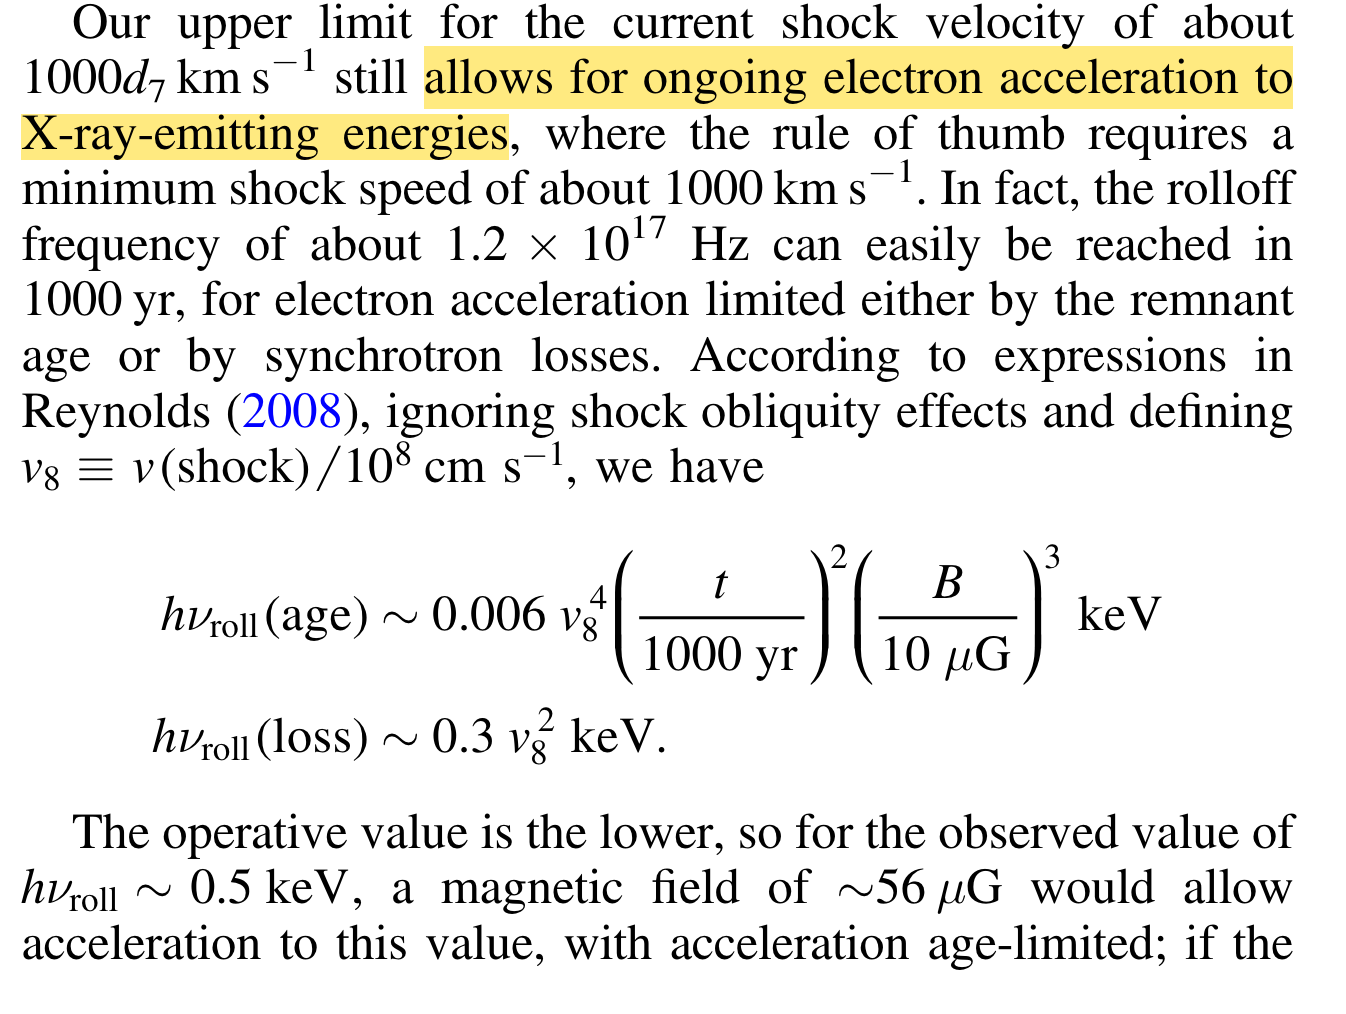

In [ ]:
# Reynolds1999

from astropy import constants as const
from astropy import units as u
h = const.h
print(h)

right = 0.5 * 1e16 * h
print(right.to(u.TeV))

In [ ]:
from astropy import constants as const
from astropy import units as u
h = const.h
print(h)
def E_max(E_ro, B):
    E_max = 120 * \
    (E_ro / u.keV) ** (1/2) * \
    (B / (1e-6 * u.G)) ** (-1/2)
    E_max = E_max #.to(u.TeV)
    return E_max
    
E_ro = 5.9 * u.keV
print(E_max(E_ro, B)) # Yes!
'''
def E_max_loss(v_sh, eta_Rj):
    E_max_loss = 2 * (v_sh)/(14000 * u.km / u.s) * (eta_Rj) ** -1 #
    return E_max_loss.to(u.one)
v_sh = 1e8 * u.cm / u.s
eta_Rj = 1.1
print(
E_max_loss(v_sh, eta_Rj)
)

def E_max_age(v_sh,  
'''

In [ ]:
from astropy import units as u

B = 1e-6 * u.G
print((B / 1e-6 * u.G) )#** (-1/2))


# B Eq
Beck 2005

For alpha > 0.5

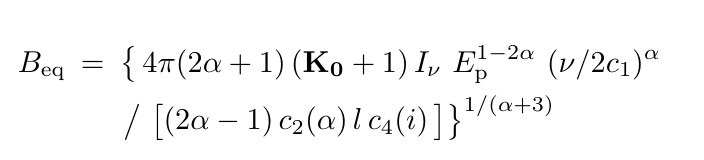

For alpha < 0.5

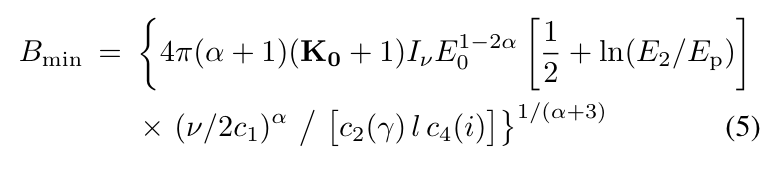

In [ ]:
from scipy.special import gamma
from astropy import units as u
import numpy as np

def B_eq_avera(alpha,i,pat_len,freq,int_flux,area): #, E_2):
    """
    Calculate the magnetic field intensity using the equipartition formula based on Beck 2005,
    with average surface brightness.
    1. i: inclination(deg) (If it's galaxy)
    2. alpha: spectral index
    3. pat_len: path length(kpc)
    4. freq: frequency (MHz)
    5. int_flux: the integrated flux intensity(Jy)
    6. area: the source area (sr)
    7. E_2: high-energy limit
    Note:the spix in S=v**(-alpha) 
    """
    #Some constants
    c1 = 6.26428 * 10 ** 18                # erg**-2 * s**-1 * G**-1
    c3 = 1.86558*10**-23                   # erg*G**-1*sr**-1
    #gamma_0 = 2.2
    # 当K_0 = 100时
    E_0 = 1                                # to correct the units
    E_p = (938.28 * 10**6)*u.eV.to('erg')  # u.erg
    # E_2 = E_2 * u.keV.to('erg')
    #E_e = (511 * 10**3)*u.eV.to('erg')    # u.erg
    L = pat_len * u.kpc.to('cm')           # pathlength(cm)             
    v = freq * 10**6                       # frequency（Hz）       
    K_0 = 100                      
    sur_bri = int_flux / area              # Jy/sr
    I_v = sur_bri * 10**-23                # Jy/sr to erg * cm**-2 * s**-1 * Hz**-1 * sterad**-1
    c4_i = (2/3) ** (( 1 + alpha)/2)
#     c2a = (1/4) * c3 * (alpha + (7/3)) / (alpha + 1) * gamma((3 * alpha - 1)/12) \
#      * gamma((3 * alpha + 7)/12)
    
    r = 2 * alpha + 1
    c2r = (1/4) * c3 * (r + (7/3)) / (r + 1) * gamma((3 * r - 1)/12) \
         * gamma((3 * r + 7)/12)
    c2a = c2r
    
    if alpha > 0.5:
        print(alpha)
        B_eq = ((4 * np.pi * (2 * alpha + 1) * (K_0 +1 ) * I_v * E_p ** (1-2*alpha)*(v/(2*c1))**alpha) / ((2*alpha-1)*c2a*L*c4_i))**(1/(3+alpha))
    else:
        B_eq = (4 * np.pi * (alpha + 1) * (K_0 + 1) * I_v * E_0 ** (1 - 2 * alpha) * (1/2 + np.log(E_2 / E_p)) * (v / (2 * c1)) ** alpha / (c2r * L * c4_i)) ** (1 / (3 + alpha))
    return B_eq


# for PWN
'''
B_PWN = B_eq_avera(alpha = 0.2,      # From preview study
                   i = 0,            # no 
                    pat_len = 7,      # kpc
                    freq = 887.5,     # in MHz
                    int_flux = 0.279,
                    area = 2.9e-7,
                    E_2 = 7)
'''

# for SNR 
B_SNR = B_eq_avera(alpha = 0.51,       # typical
                    i = 0,             # no 
                    pat_len = 7,       # kpc
                    freq = 887.5,      # MHz
                    int_flux = 0.063,  # Jy
                    area = 2.9e-7)     # sr
 


print(
    f"PWN, {B_PWN}\u03BCG",'\n',
    f"SNR, {B_SNR}\u03BCG"
)

In [ ]:
from load_fits_image import *


hdr, data, wcs = load_fits_image('final_image/acisf19919N002_cntr_img2.fits')
hdr0, data0, wcs = crop(hdr, data, 210.1871835, -63.4292133, 0.05)
pf.writeto('chandra_merged_2.fits', data0, hdr0, overwrite=True)
    
    

In [ ]:
mu_2 = 1000 ** (-0.3)

In [ ]:
mu_2

## breaking index

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# 第一条直线：已知指数和给定点
alpha_r = -0.4
point_r = (887e6 , 0.227 * 887e6  )

gamma = 2.07


# 计算能量和频率
energy = 1  # 给定的能量，单位为 keV
point_x_freq = energy * 1000 * 1.602e-19 / 6.626e-34


# 第二条直线：已知指数和给定点
alpha_x = 1. - gamma
point_x = (point_x_freq, 2.2e-11 )#* 1e-34) #erg s^-1 cm^-2
print (point_x_freq)


# 输出交点坐标
print(f"The intersection point coordinates are: ({x_intersect:.2f}, {y_intersect:.2f})")

# 生成直线的x值范围，在对数坐标下取对数
freq_r = np.logspace(0, 12, 100)
freq_x = np.logspace(8, 22, 100)

# 计算两条直线的y值
flux_r = point_r[1] * (freq_r / point_r[0]) ** alpha_r
flux_x = point_x[1] * (freq_x / point_x[0]) ** alpha_x



# 绘制两条直线
plt.figure(figsize=(8, 6))
plt.plot(freq_r, flux_r, label=f'y = {point_r[1]} * (x / {point_r[0]:.2e})^{alpha_r}', color='red')
plt.plot(freq_x, flux_x, label=f'y = {point_x[1]} * (x / {point_x[0]:.2e})^{alpha_x:.2f}', color='blue')
plt.scatter(point_r[0], point_r[1], color='red', label=f'Given Point ({point_r[0]:.2e}, {point_r[1]:.2e})')
plt.scatter(point_x[0], point_x[1], color='blue', label=f'Given Point ({point_x[0]:.2e}, {point_x[1]:.2e})')
# plt.scatter(x_intersect, y_intersect, color='green', label=f'Intersection ({x_intersect:.2f}, {y_intersect:.2f})')

plt.xscale('log')
plt.yscale('log')
'''
plt.xlabel('Logarithmic x-axis')
plt.ylabel('Logarithmic y-axis')
plt.title('Power Law Relationship in Log Scale')
plt.grid(True)
'''
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from matplotlib import pylab as plt
from matplotlib.patches import Circle
from load_fits_image import *



hdr, data, wcs = crop(hdr, data, 214.8, -60.85, 0.8)

def show_obssch(fitsfile, freq):
    hdr, data, wcs = load_fits_image(fitsfile)

    xlam = 0.3 / freq
    D = 22.
    beam = xlam/D*180./np.pi
    theta = xlam/(np.sqrt(3.)*D)*180./np.pi
    print(beam)

    ax = show_img(data, wcs, show_cb = False)

    '''
    hdr, data, wcs = crop(hdr, data, 214.8, -60.85, 0.8)
    f = open(mosname,"r")
    all = f.readlines()
    f.close()
    
    ref_pos = all[0].split('is ')[1].split(',')
    '''
    ra0 = '14:00:45' #ref_pos[0].strip() #14:00:45.3616,-63:25:42.243
    dec0 = '-63:25:42' #ref_pos[1].strip() # strip 去除可能存在的空格
    coord = SkyCoord(ra0, dec0, unit=(u.hourangle, u.deg), frame='icrs')
    ra0, dec0 = coord.ra.deg, coord.dec.deg
    color = 'tomato'
    n = 0
    
    '''# for term in all:
        # print(term)
        if term[0] == "#": continue
        # print(term)
        n += 1
        t0 = term.split()
        x = float(t0[0])
        y = float(t0[1])
        ss = t0[-1].split('_')[1]#[:-1]'''
    posx = ra0 
    posy = dec0
    # coord = SkyCoord(posx, posy, unit=(u.hourangle, u.deg), frame='icrs')
    x, y = wcs.wcs_world2pix(posx, posy, 0)
    r = beam/((3600*(abs(hdr['CDELT2']))))
    '''
    ellipse = Ellipse((posx, posy), r, r, angle = theta, facecolor='none', edgecolor = color, linestyle='-', linewidth=2, transform=ax.get_transform('world'))
    ax.add_patch(ellipse)
    '''
    circle = Circle((x, y ), radius =r*1.95, facecolor='none', edgecolor = color, linewidth = 1)
    ax.add_patch(circle)
    ax.annotate(n, (x,y), xytext=(0, 0), textcoords='offset points',color = 'white')#ss
    set_ax(ax, num_ticks=5)
    
    # sv_fig(mosname.replace('.mos', ''))  
    plt.show()
    print(n)
    # ax.title(n)
    # 
    # 
    return ax

# mosname = '../obs_24Apr/'
fitsfile = './final_image/linmos.image_16SBIDs.taylor.0.fits'
freq = 3.1
show_obssch(fitsfile, freq)

# mosname = '../obs_24Apr/kkbr_6.5_sub.mos'#
freq = 6.5
show_obssch(fitsfile, freq)

In [ ]:
import pandas as pd
from matplotlib import pylab as plt
from matplotlib.patches import Circle
from load_fits_image import *


hdr, data, wcs = load_fits_image(fitsfile)

ra0 = '14:00:45' #ref_pos[0].strip() #14:00:45.3616,-63:25:42.243
dec0 = '-63:25:42' #ref_pos[1].strip() # strip 去除可能存在的空格
coord = SkyCoord(ra0, dec0, unit=(u.hourangle, u.deg), frame='icrs')
ra0, dec0 = coord.ra.deg, coord.dec.deg
hdr, data, wcs = crop(hdr, data, ra0, dec0, 0.4)
pf.writeto('./24Apr_ATCA/G310.fits', data, hdr, overwrite=True)

Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set MJD-OBS to 55517.569825 from DATE-OBS'. [astropy.wcs.wcs]


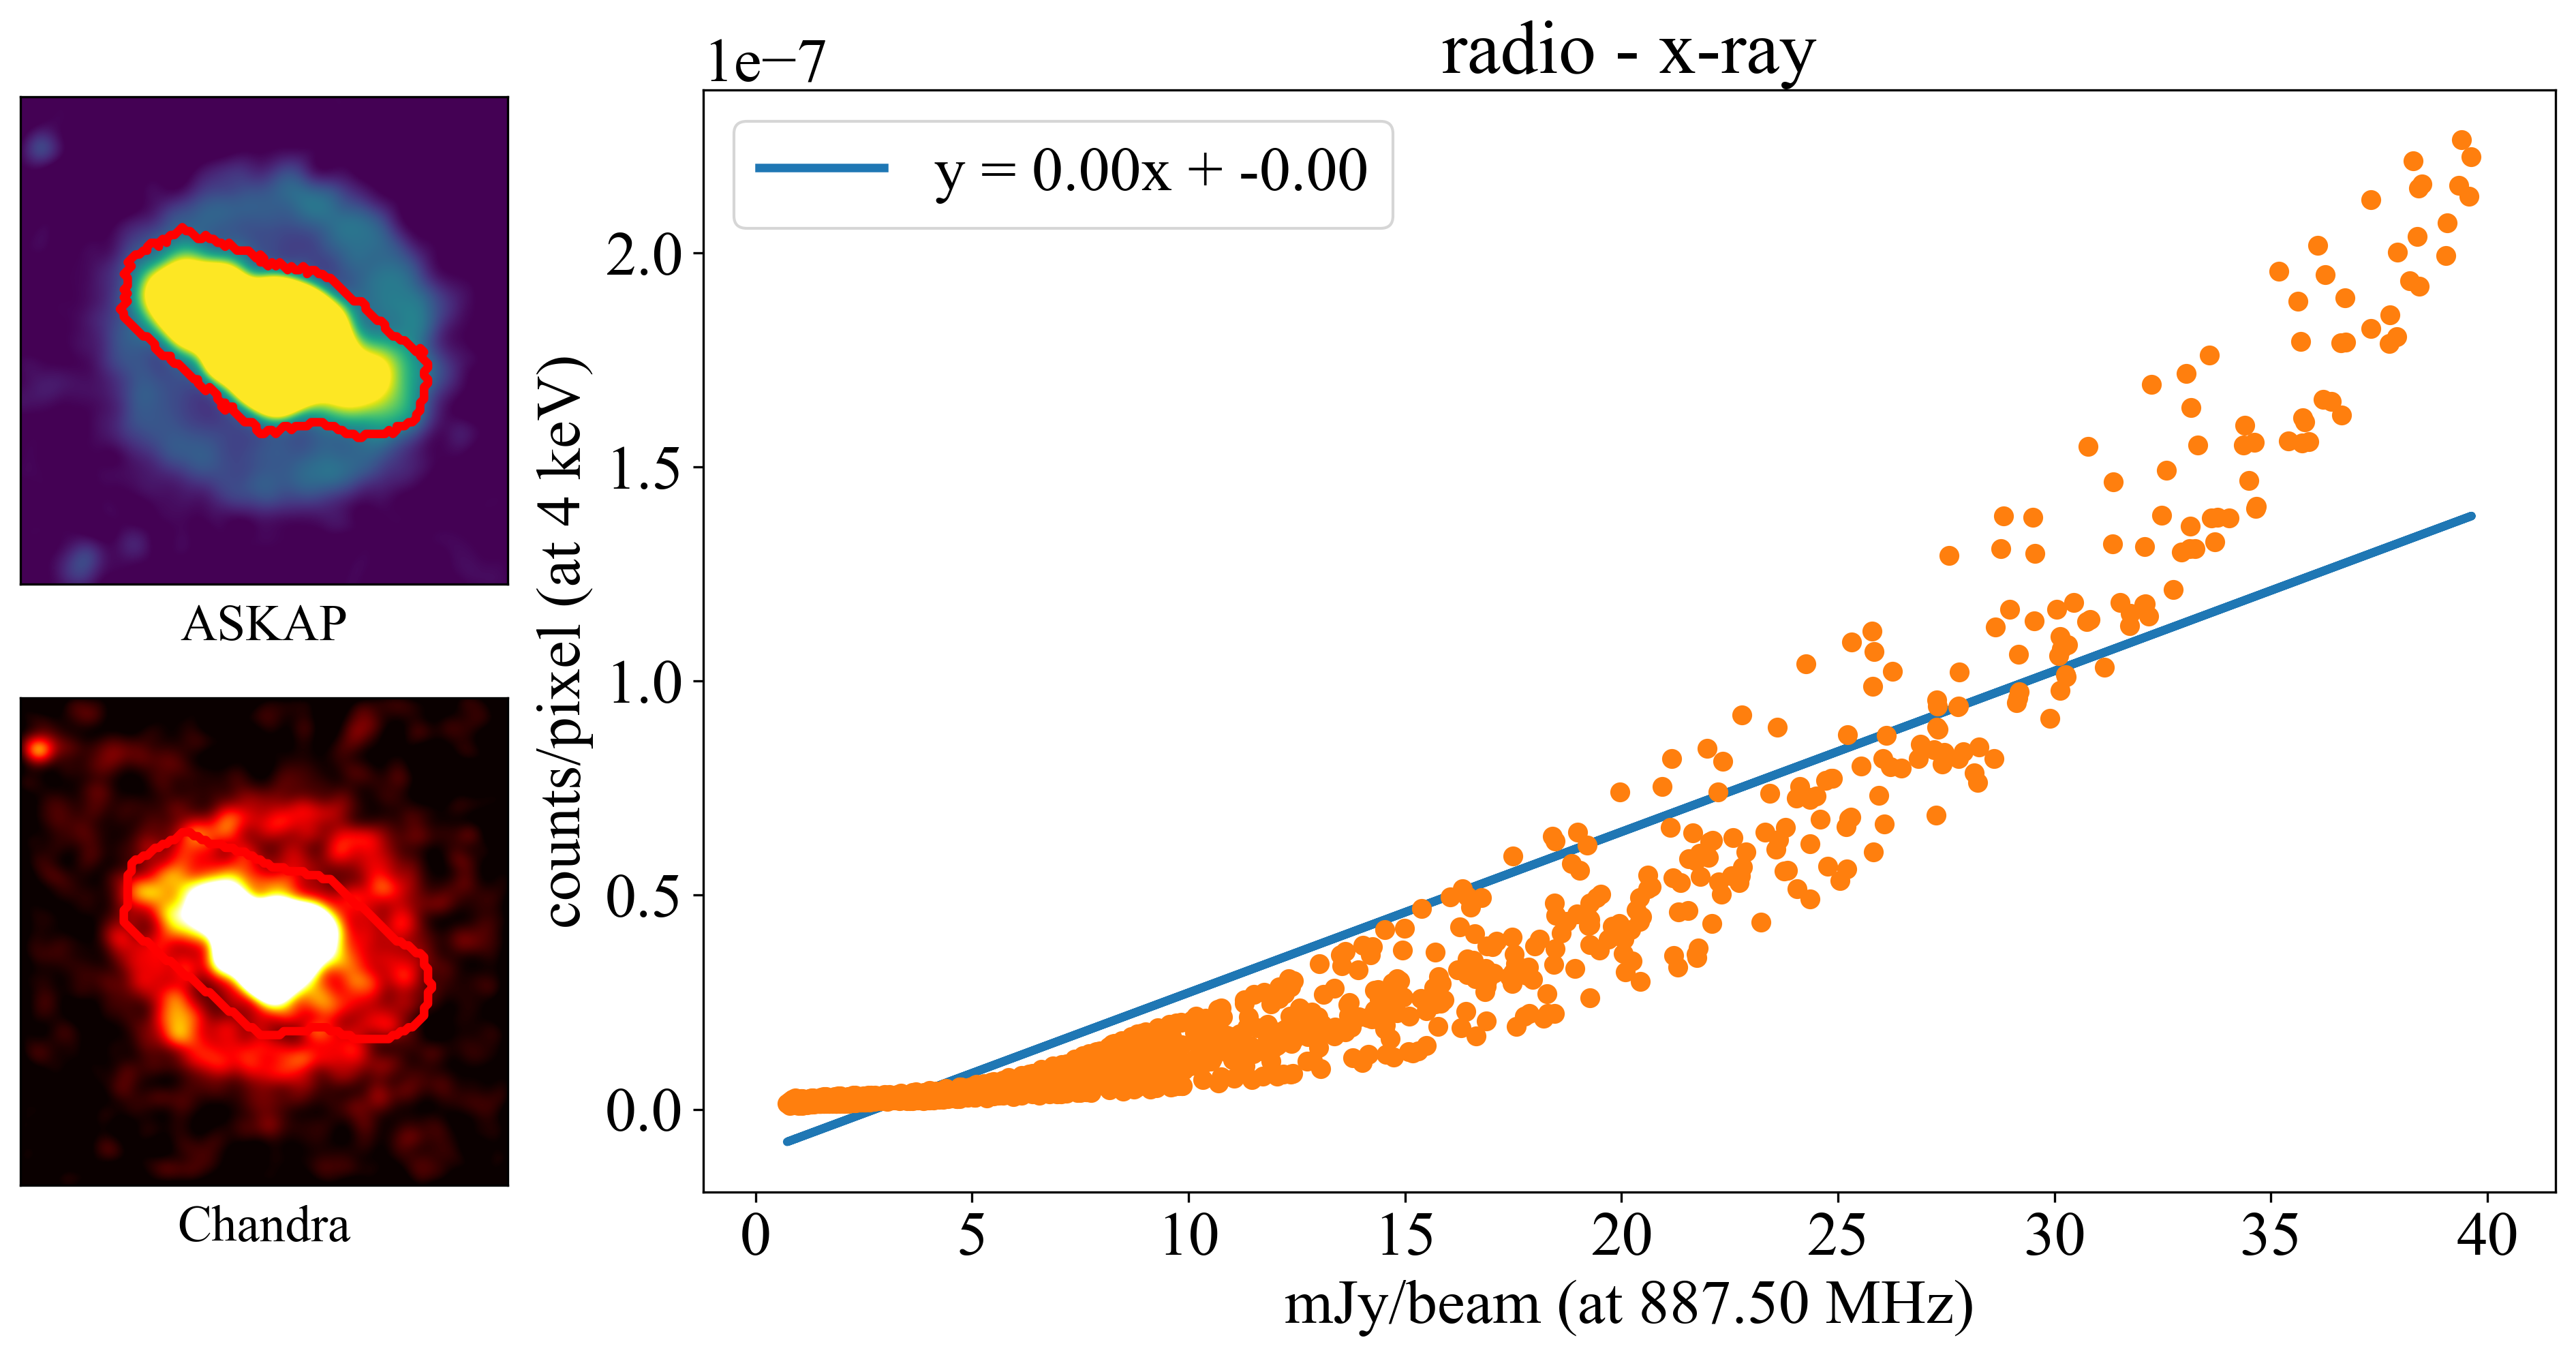

In [12]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from astropy.io import fits as pf
from astropy.wcs import WCS
import numpy as np
from astropy.convolution import convolve,Gaussian2DKernel
from reproject import reproject_interp

import os
import sys
from scipy import odr
from scipy import signal
from astropy.modeling import models, fitting
from astropy import units as u

plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3


def smooth(data_in, hpbw=4.):
    """
    smoothing
    """
    g = Gaussian2DKernel(hpbw)

    data_out = convolve(data_in, g, boundary='extend')

    return data_out


grid = plt.GridSpec(2, 4, wspace=0.4, hspace=0.2)




def snr_plot(name,file,position,vmin=20,vmax=90,cmap='viridis',title='unknown'):
    
    hdu = pf.open(name)[0]
    hdr = hdu.header
    wcs = WCS(hdr)
    data = hdu.data
    
    data[np.isnan(data)] = 0
    vmin = np.percentile(data,vmin)
    vmax = np.percentile(data,vmax)
    
    ax = plt.subplot(position,projection = wcs)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='spline36', cmap=cmap, origin='lower')


    hdu_x = pf.open(file)[0]
    data_x, footprint = reproject_interp(hdu_x, hdr)
    # data_x = smooth(data_x,1.1)
    ax.contour(data_x, levels=0, colors='r')
    
    

    ra = ax.coords[0]
    dec = ax.coords[1]
    
    ra.set_ticks_visible(False)
    ra.set_ticklabel_visible(False)
    dec.set_ticks_visible(False)
    dec.set_ticklabel_visible(False)


    ax.set_title(title,fontsize=18,y=-0.15)
    
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')

    
    return im

#t-tplot



def cal_alpha(data1,data2):
    n = data1.size
    x = np.zeros(n) # 长度为n的数组，每个值都是0
    y = np.zeros(n)
    kk = 0
    for i in range(n):
        if np.isnan(data1[i]) or np.isnan(data2[i]): continue #如果有为nan的值，则跳过进行下一次迭代
        x[kk] = data1[i]
        y[kk] = data2[i]
        kk += 1

    if kk<10: return np.nan,np.nan,np.nan,np.nan

    p_init = models.Polynomial1D(1)
    fit_p = fitting.LinearLSQFitter()
    p = fit_p(p_init, x[:kk], y[:kk])
    a, b = p.c0.value, p.c1.value #c0 截距 c1 斜率
    return a, b


def ttplot(file,file1,file2,f1_freq,f2_freq,position):

    #设置频率
      # in GHz
    freq1 = f1_freq
    freq2 = f2_freq
	#对指定区域进行拟合，例如本文就是设定mask大于0.5区域是目标源
    mask = pf.getdata(file)  

	#导入两个频率下的温度数据
    data1 = pf.getdata(file1)[mask>0.5]#[::i*5]
    data2 = pf.getdata(file2)[mask>0.5]#[::i*5]
    data1 = data1*1e3

    ax = plt.subplot(position)

    import numpy as np

    # 进行线性拟合
    coefficients = np.polyfit(data1, data2, 1)
    a, b = coefficients
    
    # 构造包含拟合公式的字符串
    fit_equation = "y = {:.2f}x + {:.2f}".format(a, b)
    
    # 绘制线性拟合直线，并使用label显示拟合公式
    ax.plot(data1, a * data1 + b, label=fit_equation)
    
    # 添加图例以显示拟合公式
    ax.legend()

    ax.plot(data1, data2, 'o')


    # ax.plot(data1, a1_p + b1_p * data1)
    # ax.plot(data1, a2_p + b2_p * data1)
    # ss = r'$-$' + '%0.3f' % abs(alpha_1.value) + r'$\pm$' +  '%0.3f' % d_alpha_1.value + str(alpha_1.unit)
    
    # ss = r'$\alpha 1$' +'  %1.1e '%(alpha1.value) + r'$\rm{counts\ pixel^{-1}\ MHz^{-1}\ keV^{-1}}$' +'\n' +\
         # r'$\alpha 2$' +'  %1.1e '%(alpha2.value) + r'$\rm{mJy\ beam^{-1}\ MHz^{-1}\ keV^{-1}}$'
    
    # ax.text(0.1, 0.9, ss, horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    ax.set_xlabel('mJy/beam (at %5.2f MHz)' % freq1.value)
    ax.set_ylabel('counts/pixel (at %1.0f keV)' % freq2.value)

    ax.set_title("radio - x-ray")
    return ax
# aim = ['bottom','left','right','all']

# for i in range(len(aim)):




freq1 = 887.5*u.MHz 
freq2 = 4*u.keV  


# for i in range(5):
fig = plt.figure(figsize=(16, 7),dpi=300)

file = ('../Fits/G310_i_EMU_r250_PWN.mask.fits')

file1 = ('../Fits/G310_i_EMU_r250.fits')
position = grid[0, 0]
snr_plot(file1,file,position,vmin=40, vmax=90,title='ASKAP')



file2 = ('../Fits/G310_i_Chandra_r250_smooth.fits')
position = grid[1, 0]
snr_plot(file2,file,position,vmin=20, vmax=95,cmap='hot',title='Chandra')



position = grid[0:, 1:]
ttplot(file,file1,file2,freq1,freq2,position)

# plt.suptitle(i)
    
    # plt.show()为什么加上这个就保存不出来图片了
# output = ('./radio-x'+str(i)+'_plot.pdf')
    # plt.savefig(output, bbox_inches='tight')
        
plt.show()

# Parameter

## workflow

### Measurable parameters
   
- PWN:  Flux density, mean radius, area, the peak/mean value.
   
- Shell: radius, flux density, area, the peak/mean value.

- Backgroud: mean value, RMS
   
### Calculable parameters

- Surface brightness of PWN and Shell.

- Eqp B and E_min

### relationship between X-ray and radio


## calculate Flux density error

Dokara2021

$\rm{S=\frac{\Sigma_iI_i}{A_{beam}}}$ and $\rm{\Delta S = \sigma_1 \sqrt{\frac{N_{src}}{A_{beam}}}}$

In [ ]:
import sys,re
from astropy.io import fits as pf
import astropy.wcs as wcs 
import numpy as np
import json
from sphericalpolygon import Sphericalpolygon
from astropy import units as u

#-----------------------------------------------------------------------------#
def main():

    # Load the FILE file
    args = sys.argv[1:]
    if len(args)<3:
        print("\n\tUSAGE: calIntFlux_polygon.py filename source_mask bg_mask\n")
        sys.exit(0)
    else:
        fitsName = args[0]
        srcMaskName = args[1]
        bkgMaskName = args[2]
        srcMaskFits = args[3]
        bkgMaskFits = args[4]
    [header,xydata]=load_fits_image(fitsName)

    if 'BMAJ' not in header:
        print("Please provide beam information!")
        header['BMAJ'] = float(input("BMAJ in deg: "))
        header['BMIN'] = float(input("BMIN in deg: "))
        header['BPA'] = float(input("BPA in deg: "))

    w = wcs.WCS(header)

    srcMask_fits = pf.getdata(srcMaskFits)
    bkgMask_fits = pf.getdata(bkgMaskFits)

    srcMask = json.load(open(srcMaskName,"r"))
    bkgMask = json.load(open(bkgMaskName,"r"))

    srcMask_new = np.flip(srcMask)
    srcMask = np.reshape(srcMask_new, (srcMask_new.size//2,2))

    bkgMask_new = np.flip(bkgMask)
    bkgMask = np.reshape(bkgMask_new, (bkgMask_new.size//2,2))

    polygon_src = Sphericalpolygon.from_array(srcMask*u.deg) 
    polygon_bkg = Sphericalpolygon.from_array(bkgMask*u.deg)

    M, N = xydata.shape
    
    with open('all.data','a+') as f1:
        print('total area: ', polygon_src.area(),file=f1) 
    
    
    # calculate background
    Num = 0
    tot_bkg = 0.
    tot_bkg2 = 0.
    for i in range(M):
        for j in range(N):
            if np.isnan(xydata[i,j]): continue
            if bkgMask_fits[i,j]<0.5: continue
            x = w.wcs_pix2world([(j,i)],0)
            ra = x[0][0]
            dec = x[0][1]

            if polygon_bkg.contains_points([dec, ra]):
                tot_bkg += (xydata[i,j])
                tot_bkg2 += (xydata[i,j]) * (xydata[i,j])
                Num += 1 # the number of pixel
    ave_bkg = tot_bkg / Num
    rms = np.sqrt(tot_bkg2/Num - ave_bkg*ave_bkg)
    
    with open('all.data','a+') as f1:
        print("bkg: ", ave_bkg,file=f1)
        print("rms: ", rms,file=f1)

    # calculate integrated flux density
    Num = 0
    tot_flux = 0.
    tot_flux_bkg = 0.
    for i in range(M):
        for j in range(N):
            if np.isnan(xydata[i,j]): continue
            if srcMask_fits[i,j]<0.5: continue
            x = w.wcs_pix2world([(j,i)],0) # ?这里为什么设置为0
            ra = x[0][0]
            dec = x[0][1]

            if polygon_src.contains_points([dec, ra]):

                tot_flux += xydata[i,j] 
                tot_flux_bkg += (xydata[i,j]) - ave_bkg 
                Num += 1

    polygon_src.area()
    int_flux = tot_flux * ((polygon_src.area()/Num) /(1.13*np.radians(header['BMAJ'])*np.radians(header['BMIN'])))
    int_flux_bg = tot_flux_bkg * ((polygon_src.area()/Num)/(1.13*np.radians(header['BMAJ'])*np.radians(header['BMIN'])))
    with open('all.data','a+') as f1:
        print("Number of points: ", Num,file=f1)
    with open('IntFlux.data','a+') as f:
        print("{0:<8.4f}{1:11.4f}{2:9.4f}".format(int_flux,int_flux_bg,rms * np.sqrt(Num)),file=f)    


## records: measureable parameters

In [16]:
import numpy as np
from astropy import units as u
from astropy import constants as const

#constant
M_sun = const.M_sun
m_p = const.m_p
m_e= const.m_e

E_100= 100 *u.TeV
B_100 = 100 *u.uG

r_i = 60 *u.arcsec
r_o = 90 *u.arcsec


# FluxD: flux density 

FluxD_PWN = 0.227 *u.Jy
FluxD_SNR = 0.054 *u.Jy


area_pwn = 5.600244685937446e-07 *u.degree**2
print(area_pwn.to(u.arcsec*u.arcsec)) #sopposed: 7931.27
area_pwn = 7931.27*u.arcsec**2
print(area_pwn.to(u.arcmin**2))

7.25791711297493 arcsec2
2.203130555555556 arcmin2


In [17]:

def SurBri(r_i, r_o, FluxD, freq=0.887, alpha=-0.5):
    SolidAngle = np.pi * (r_o**2 - r_i**2)
    SurBri = FluxD / SolidAngle
    SurBri_1 = SurBri * (1/freq)**(-alpha)

    result = [
        f'Surface Brightness at {freq} GHz: {SurBri.to(u.Unit("W m^-2 Hz^-1 sr^-1")):.2e}',
        f'Surface Brightness at 1GHz: {SurBri_1.to(u.Unit("W m^-2 Hz^-1 sr^-1")):.2e}'
    ]

    return result

def R(r_o,d=7* u.kpc):
    R = d * np.tan(r_o)
    return R.to(u.pc)

d_7= 1#d/(7*u.kpc)

E_51= 1.e51 * u.erg


def expansion(E,m_eje,R):
    v_ini_exp = np.sqrt(2*E / m_eje)
    age_free_exp = R / v_ini_exp
    return v_ini_exp,age_free_exp

def sweptup_mass(n_0,m_ism):
    rho_0 = n_0* (m_ism)
    m_sw = (rho_0 * (4/3)*np.pi*(R**3)).to(u.kg)
    return m_sw
    
'''
#\citep{Miceli2013}
# timescale of synchrotron cooling
def timescale(E,B):
    t_sync = 1.25 *E/E_100 * B/B_100
'''

# x-ray test
r_i = 50 * u.arcsec
r_o = 75 * u.arcsec
FluxD = 40.76 * u.mJy


pwn_result = SurBri(r_i, r_o, FluxD_PWN)
print(f'PWN: {pwn_result}')

snr_result = SurBri(r_i, r_o, FluxD_SNR)
print(f'SNR: {snr_result}')


R=R(r_o)
print(f'R: {R}')

print('normal expansion')
m_eje= 10*M_sun
v_ini_exp,age_free_exp=expansion(E_51,m_eje,R)
print(f'initial expansion velovity: {v_ini_exp.to(u.Unit("km s^-1")):.0f}')
print(f'undecelerated(free expansion) age: {age_free_exp.to(u.yr):.0f}')

print('sub expansion')
E_sub = 5.e49*u.erg
m_eje_sub = 3*M_sun
v_ini_exp,age_free_exp=expansion(E_sub,m_eje_sub ,R)
print(f'initial expansion velovity: {v_ini_exp.to(u.Unit("km s^-1")):.0f}')
print(f'undecelerated(free expansion) age: {age_free_exp.to(u.yr):.0f}')


n_0 = 0.013 * d_7 **(-1/2)*u.cm**-3 #cm^-3
m_ism=m_p*0.85+4*m_p*0.15
m_sw = sweptup_mass(n_0,m_ism)
print(f'swept-up mass: {(m_sw/(M_sun*((d_7)**(5/2)))):.3f}')


tau = 12.7*u.kpc
n_e= m_e*n_0
t=tau/n_e
print(t)

kT_e = 2.2*u.keV
#算出来的不一致
v_sh=np.sqrt(2*kT_e/m_e)
print(f'shock velocity: {v_sh.to(u.km/u.s):.2f}')

v_sh=1400 *u.km /u.s
E_cur=m_sw * v_sh**2 /2
print(E_cur.to(u.erg))

PWN: ['Surface Brightness at 0.887 GHz: 9.84e-21 W / (Hz m2 sr)', 'Surface Brightness at 1GHz: 1.04e-20 W / (Hz m2 sr)']
SNR: ['Surface Brightness at 0.887 GHz: 2.34e-21 W / (Hz m2 sr)', 'Surface Brightness at 1GHz: 2.48e-21 W / (Hz m2 sr)']
R: 2.5452719379972537 pc
normal expansion
initial expansion velovity: 3171 km / s
undecelerated(free expansion) age: 785 yr
sub expansion
initial expansion velovity: 1295 km / s
undecelerated(free expansion) age: 1922 yr
swept-up mass: 0.032
1.0724359725479687e+33 cm3 kpc / kg
shock velocity: 27818.71 km / s
6.270151411022448e+47 erg


In [30]:
np.degrees(2000*7.e-6/7.e3)*3600.


0.4125296124941927

4.3.4 The Expected Post-shock Electron-Ion Temperature Ratio

In [28]:


tao = 2e9/0.02 * u.s
print(tao.to(u.yr))

n_e = 4.8 * n_0
print(f"n_e = {n_e}")



kT_e = 2.2*u.keV
#算出来的不一致
v_sh=np.sqrt((16/3)*(kT_e/m_e))
print(f'shock velocity: {v_sh.to(u.km/u.s):.2f}')

v_sh = 1000 * u.km/u.s
m_sw = 0.017 * M_sun #?

# current kinetic energy
E_k = m_sw * v_sh **2 /2
print(E_k.to(u.keV))





3168.8087814028945 yr
n_e = 0.0624 1 / cm3
shock velocity: 45427.77 km / s
1.0549076513952851e+56 keV


# 

Column density:    $ \rm{N_H= 2.75(2.63,2.88) \times 10^{22} cm^{-2}}$

Photon index:   $\rm{ \Gamma =2.55(2.47,2.64)} $

(absorbed) flux (0.8-7 kev): $\rm{1.1 \times 10^{-12} erg\ cm ^ {-2} s ^{-1}}$

X-ray luminosity: $\rm{1.5 \times 10^{34}\ d_7^2\ erg\ s^{-1}}$

## kine

The free-expansion age is 0.4-1 kyr.

The observed size gives a relation between explosion energy and preshock density of $\rm{E_{51} \lesssim 0.035 n_0 d_7^5}$

the preshock density $\rm{n_0=0.013(0.007,0.018)d_7^{(-1/2)}cm^{-3})}$

the swept-up mass 



$\rm{kT_e = m_e v^2 /2}$

In [ ]:
m_p

<<class 'astropy.constants.codata2018.CODATA2018'> name='Proton mass' value=1.67262192369e-27 uncertainty=5.1e-37 unit='kg' reference='CODATA 2018'>

In [ ]:



# 7.1 Blast wave
# emission measure-weight ionnization timescale
# tau= 0.2 * age * n_e

# age_lower = 1000*u.yr
# v_lower = r/age_lower
# E_upper = 0.5 * v_lower


# E = (0.4 * n_0 * r**5) / t**2
# age_expansion = 2.5*u.kyr #kyr

# v_shock = (r / (age_expansion)) #pc/myr ≈ km/s
# 
# print(f"current shock velocity : {v_shock.to(u.km/u.s)}")







#reverse shock
v_sh_nominal = 4.e-4 * r/(1*u.yr)
print(f'nominal shell movement: {v_sh_nominal.to(u.km/u.s):.0f}')


# 7.4 Low-energy Supernovae



1.0
the radius:2.5452718258250635 pc
initial expansion velovity: 3171 km / s
undecelerated(free expansion) age: 785 yr
a lower initial expansion velovity: 1295 km / s
a lower (free expansion) age: 1922 yr
the preshock density: 0.013 1 / cm3
2.175592720678195e-29 kg / cm3
swept-up mass: 0.0222
t 1000
shock velocity: 27819 km / s
nominal shell movement: 995 km / s


In [ ]:
#R19 7.1 PSR
t =1000 *u.yr
E_spdn=5.1e37 *u.erg /u.s
E = E_spdn* t
E.to(u.erg)

<Quantity 1.6094376e+48 erg>

current shock velocity: 3.393695767766752e-05


## Evolutionary
follow R10
- the radius method of van der Swaluw & Wu (2001)

In [ ]:
#R10
R =1/4 #ratio
n_0 = 0.01
E_51 = 1e51
eta_3 = 1 # 1~3
E_sd = 2e48*E_51*((R/0.25)**3)*(eta_3/2)**(-3)
tau = 1200*E_51*((R/0.25)**3)*(eta_3/2)**(-3)


# upper limit: HESS non detection



E_sd

1.6000000000000001e+100

In [ ]:
import numpy as np
np.radians(2.5/3600.)*7.e3
np.degrees(5.1/7.e3)*60


2.5046440758575983

## PWN spectral index

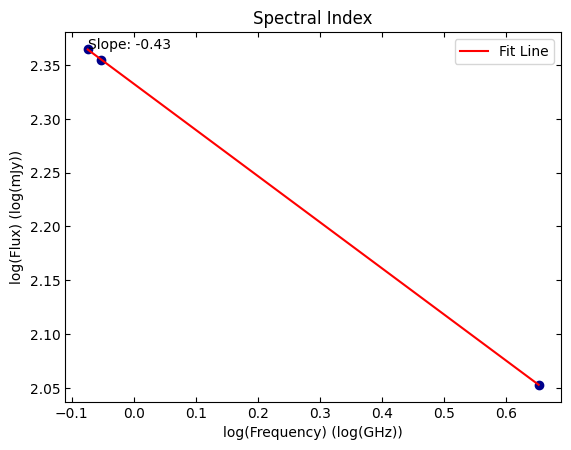

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

frequencies = np.array([0.843, 0.887, 4.5])  # GHz
fluxes = np.array([231.7, 226, 113])  # mJy #文献里给出来的是217.4 我算出来的是231.7


log_frequencies = np.log10(frequencies)
log_fluxes = np.log10(fluxes)

coefficients = np.polyfit(log_frequencies, log_fluxes, 1)
slope = coefficients[0]

fit_line = np.poly1d(coefficients)

plt.plot(log_frequencies, log_fluxes, marker='o', linestyle='none', color='darkblue',)
plt.plot(log_frequencies, fit_line(log_frequencies), linestyle='-', color='r', label='Fit Line')
plt.xlabel('log(Frequency) (log(GHz))')
plt.ylabel('log(Flux) (log(mJy))')
plt.title('Spectral Index')

plt.text(np.min(log_frequencies), np.max(log_fluxes), f'Slope: {slope:.2f}',)# fontsize=12, horizontalalignment='right', verticalalignment='bottom'

plt.legend()
plt.show()


## R9 7.4 low-energy Supernovae

# for SNR in sedov phase

Kinetic energy of expansion(KE) is transfered into internal energy - total energy remains roughly the same.

The temperature of the gas is related to the internal energy.

$T \approx 10^6 k E_{51}^{1/2} n^{-2/5} (t/2 *10^4yr)^{-6/5}$  (

In [ ]:
from scipy.special import gamma
from astropy import units as u
import numpy as np

def B_eq_avera(alpha,i,pat_len,freq,int_flux,glax_area):
    """
    Calculate the magnetic field intensity using the equipartition formula based on Beck 2005,
    with average surface brightness.
    1. i: galaxy inclination(deg)
    2. alpha: spectral index
    3. pat_len: path length(kpc)
    4. freq: frequency (MHz)
    5. int_flux: the integrated flux intensity(Jy)
    6. glax_area: the galaxy area (radians**2)
    Note:the spix in S=v**(-alpha) 
    """
    #Some constants
    c1 = 6.26428 * 10 ** 18                # erg**-2 * s**-1 * G**-1
    c3 = 1.86558*10**-23                   # erg*G**-1*sr**-1
    #gamma_0 = 2.2                         # 当K_0 = 100时
    E_p = (938.28 * 10**6)*u.eV.to('erg')  # u.erg
    #E_e = (511 * 10**3)*u.eV.to('erg')    # u.erg
    L = pat_len * u.kpc.to('cm')           # pathlength(cm)             
    v = freq * 10**6                       # frequency（Hz）       
    K_0 = 100                      
    sur_bri = int_flux/glax_area           # Jy/sr
    I_v = sur_bri*10**-23                  # Jy/sr to erg * cm**-2 * s**-1 * Hz**-1 * sterad**-1
    c4_i = (2/3)**((1+alpha)/2)
#     c2a = (1/4) * c3 * (alpha + (7/3)) / (alpha + 1) * gamma((3 * alpha - 1)/12) \
#      * gamma((3 * alpha + 7)/12)
    
    r = 2*alpha+1
    c2r = (1/4) * c3 * (r + (7/3)) / (r + 1) * gamma((3 * r - 1)/12) \
         * gamma((3 * r + 7)/12)
    c2a = c2r
    
    
    B_eq = ((4*np.pi*(2*alpha+1)*(K_0+1)*I_v*E_p**(1-2*alpha)*(v/(2*c1))**alpha) / ((2*alpha-1)*c2a*L*c4_i))**(1/(3+alpha))
    return B_eq


B_glob = B_eq_avera(0.500001,0,7,27.9,887.5,2.9e-7)

print(B_glob,'\u00B5G')

0.0006772501940352022 µG


## sedov-age

In [ ]:
def SNRage(size, d ,n = 1, E=1e51):
    size_rad = (size)*3.14/180
    R = d*size_rad/2
    t = 4.8 * ((E/(10**51))**(-1/2))*((n/1)**(1/2))*((R/10)**(5/2))
    print('E/n:'+ str(E/n))
    return t
#size-deg,d-pc,SNRage-kyr
size=3/60
SNRage(size,7000,0.5,1e49)*1000

E/n:2e+49


1747.6892651986834

In [ ]:
import numpy as np
E_51=1E51
m_sun=2e30*1e3
m=10*m_sun
v=np.sqrt(2*E_51/m)
v=v/1e5
r=4.7/2
r/v*1e6

743.1352501395692

In [ ]:
d = np.radians(2.3/3600)*7
v = d/(1000*1.e-6)
v

0.07805500265863528

## roll-off frequency


ref:\citep{Hewitt2015} \citep{Zoglauer2015}

Roll-off frequency： Peak frequency in the SED(spectral energy distribtion) of x-ray emitted by electron with energy $E_{max}$

Synchrotron emission.

Knowing that the roll-off frequecy $\rm{\nu_{roll-off}}$ of the spectrum is related to the maximum electron energy,$\rm{ E_{max}}$, following the relation.

$\rm{\nu_{rolloff} = 5\times 10^{15} Hz (\frac{B}{1 nT}) (\frac{E_{max}}{10 TeV})^2}$

ps:$\rm{1nT=10 \mu G}$


For the srcut model, the maximum elextron energy is related to the roll-off photon energy by 

$\rm{E_{max}=120 (\frac{h\nu_{rolloff}}{1 keV})^{1/2} (\frac{B}{\mu G})^{-1/2} Tev}$

## srcut


In [ ]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

from astromodels.xspec.factory import *

from astromodels import Powerlaw

ValueError: mutable default <class 'astromodels.utils.config_structure.Logging'> for field logging is not allowed: use default_factory

In [ ]:
from astropy import constants as const
from astropy import units as u

h = const.h #plank

hnu_rf=1.3*u.keV

E_max=120*(hnu_rf/u.keV)**(1/2)
# E_max=120*(1.3)**(1/2)

print(E_max)

136.82105101189657


In [ ]:
from astropy import units as u
freq_rf = 1.4e17*u.Hz
freq_1G = 1*u.GHz
S_rf = (freq_rf/freq_1G)**(-0.49)*40*u.mJy
print(S_rf.to(u.Jy))

4.078094204775205e-06 Jy
